<a href="https://colab.research.google.com/github/robertoricci/Curso-Python-para-Mercado-Financeiro-Trading-com-Dados/blob/main/Modulo%2008%20-%20Fundamentos%20do%20Portifolio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Portfólio e Risco

###1. Importando e instalando bibliotecas

In [ ]:
!pip install investpy

     |████████████████████████████████| 4.4 MB 7.1 MB/s 
     |████████████████████████████████| 235 kB 54.9 MB/s 
     |████████████████████████████████| 6.3 MB 46.9 MB/s 
     |████████████████████████████████| 503 kB 73.2 MB/s 
  Created wheel for investpy: filename=investpy-1.0.7-py3-none-any.whl size=4495221 sha256=a9f867890a5af6c99d58a599df30cebb2e7c444f5ee5e91200b4890673788435
  Stored in directory: /root/.cache/pip/wheels/50/bb/ee/760eeb6cc7ed8efc1b1b23b13b6b9f17fb1ed530fb04bd16f5
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import investpy
import numpy as np
import matplotlib.pyplot as plt


###2. Selecionando ações e distribuindo pesos

In [ ]:
ativos = ['ITSA4', 'PETR4', 'ABEV3', 'VALE3']
pesos = np.array([0.25, 0.25,0.25, 0.25])

###3. Importando Dados

In [ ]:
carteira_precos = pd.DataFrame()

In [ ]:
for i in ativos:
  df = investpy.get_stock_historical_data(stock=i, country='Brazil', from_date='01/01/2016', to_date='30/12/2020').Close
  df.rename(i,inplace=True)
  df.columns = [i]
  carteira_precos = pd.concat([carteira_precos, df], axis=1)
  carteira_precos.index.name="Date"
carteira_precos

,ITSA4,PETR4,ABEV3,VALE3
Date,,,,
2016-01-04,4.22,6.59,15.64,12.69
2016-01-05,4.29,6.41,15.88,12.52
2016-01-06,4.33,6.14,15.73,11.60
2016-01-07,4.27,6.01,15.31,10.91
2016-01-08,4.27,6.02,15.51,10.54
...,...,...,...,...
2020-12-22,11.40,27.28,15.51,86.94
2020-12-23,11.67,27.95,15.50,87.36
2020-12-28,11.80,28.18,15.77,87.31


In [ ]:
carteira_precos.head()

,ITSA4,PETR4,ABEV3,VALE3
Date,,,,
2016-01-04 00:00:00,4.22,6.59,15.64,12.69
2016-01-05 00:00:00,4.29,6.41,15.88,12.52
2016-01-06 00:00:00,4.33,6.14,15.73,11.60
2016-01-07 00:00:00,4.27,6.01,15.31,10.91
2016-01-08 00:00:00,4.27,6.02,15.51,10.54


In [ ]:
carteira_precos.tail()

,ITSA4,PETR4,ABEV3,VALE3
Date,,,,
2020-12-22 00:00:00,11.40,27.28,15.51,86.94
2020-12-23 00:00:00,11.67,27.95,15.50,87.36
2020-12-28 00:00:00,11.80,28.18,15.77,87.31
2020-12-29 00:00:00,11.87,28.27,15.95,87.07
2020-12-30 00:00:00,11.73,28.34,15.65,87.45


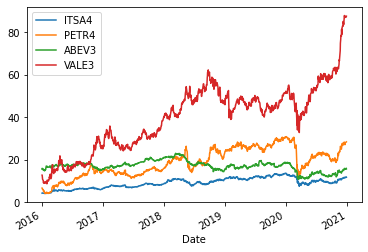

In [ ]:
carteira_precos.plot();

##4. Calculando retornos do portfólio

In [ ]:
retorno_precos = carteira_precos.pct_change()

In [ ]:
retorno_precos

,ITSA4,PETR4,ABEV3,VALE3
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.016588,-0.027314,0.015345,-0.013396
2016-01-06,0.009324,-0.042122,-0.009446,-0.073482
2016-01-07,-0.013857,-0.021173,-0.026701,-0.059483
2016-01-08,0.000000,0.001664,0.013063,-0.033914
...,...,...,...,...
2020-12-22,0.001757,0.009623,0.005837,0.000921
2020-12-23,0.023684,0.024560,-0.000645,0.004831
2020-12-28,0.011140,0.008229,0.017419,-0.000572


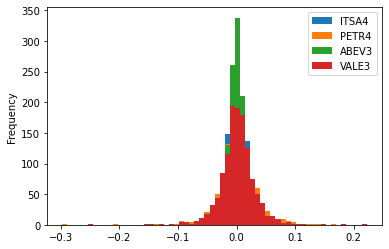

In [ ]:
retorno_precos.plot.hist(bins=60);

In [ ]:
retorno_acm_acoes = (1+retorno_precos).cumprod()

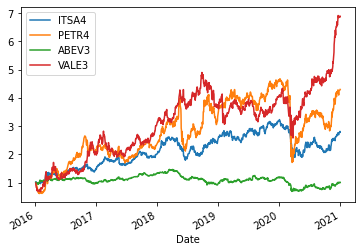

In [ ]:
retorno_acm_acoes.plot()

In [ ]:
retorno_carteira = (retorno_precos * pesos).sum(axis=1)

In [ ]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira

In [ ]:
retorno_portfolio

,Retornos
Date,
2016-01-04,0.000000
2016-01-05,-0.002194
2016-01-06,-0.028931
2016-01-07,-0.030303
2016-01-08,-0.004797
...,...
2020-12-22,0.004534
2020-12-23,0.013108
2020-12-28,0.009054


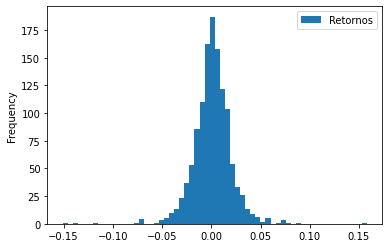

In [ ]:
retorno_portfolio.plot.hist(bins=60);


In [ ]:
retorno_portfolio.describe()

,Retornos
count,1237.000000
mean,0.001242
std,0.019719
min,-0.151025
25%,-0.008658
50%,0.001407
75%,0.011717
max,0.158050


In [ ]:
retorno_acm_carteira = (1+retorno_portfolio).cumprod()

In [ ]:
retorno_acm_carteira.head()

,Retornos
Date,
2016-01-04,1.000000
2016-01-05,0.997806
2016-01-06,0.968938
2016-01-07,0.939576
2016-01-08,0.935069


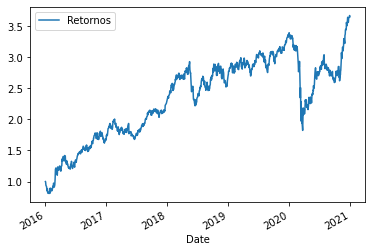

In [ ]:
retorno_acm_carteira.plot();

###5. Calculando volatilidade do portfólio

In [ ]:
cov_matrix = retorno_precos.cov()

In [ ]:
cov_matrix

,ITSA4,PETR4,ABEV3,VALE3
ITSA4,0.000424,0.000416,0.000182,0.000226
PETR4,0.000416,0.001090,0.000241,0.000511
ABEV3,0.000182,0.000241,0.000326,0.000150
VALE3,0.000226,0.000511,0.000150,0.000934


In [ ]:
vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix,pesos)))

In [ ]:
vol_carteira

0.01972716075548658

In [ ]:
vol_ano = vol_carteira*np.sqrt(252)

In [ ]:
vol_ano

0.31315896859446335

##6. Benchmark da Carteira


In [ ]:
ibov = investpy.get_index_historical_data(index='Bovespa', country='Brazil', from_date='01/01/2016', to_date='30/12/2020').Close

In [ ]:
ibov

Date
2016-01-04     42141.0
2016-01-05     42419.0
2016-01-06     41773.0
2016-01-07     40695.0
2016-01-08     40612.0
                ...   
2020-12-22    116636.0
2020-12-23    117807.0
2020-12-28    119124.0
2020-12-29    119409.0
2020-12-30    119017.0
Name: Close, Length: 1237, dtype: float64

In [ ]:
ibov_retornos = ibov.pct_change()
ibov_acm = (1+ibov_retornos).cumprod()

In [ ]:
ibov_acm.head()

Date
2016-01-04         NaN
2016-01-05    1.006597
2016-01-06    0.991267
2016-01-07    0.965687
2016-01-08    0.963717
Name: Close, dtype: float64

In [ ]:
#Criar df do benchmark

benchmark = pd.merge(retorno_acm_carteira, ibov_acm, how='inner', right_index=True, left_index=True)

In [ ]:
benchmark

,Retornos,Close
Date,,
2016-01-04,1.000000,NaN
2016-01-05,0.997806,1.006597
2016-01-06,0.968938,0.991267
2016-01-07,0.939576,0.965687
2016-01-08,0.935069,0.963717
...,...,...
2020-12-22,3.574179,2.767756
2020-12-23,3.621028,2.795544
2020-12-28,3.653813,2.826796


In [ ]:
benchmark= benchmark.dropna()

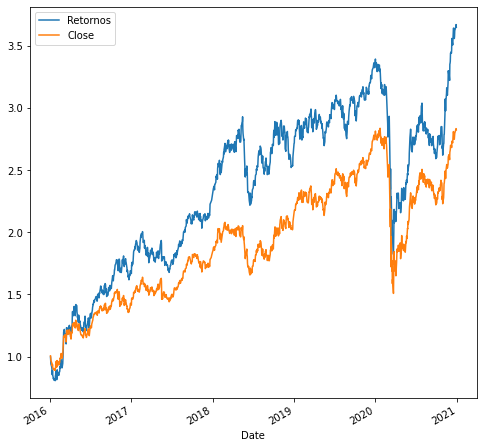

In [ ]:
benchmark.plot(figsize=(8,8));

##7. Beta da Carteira

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
benchmark = benchmark.rename({'Close': 'IBOV'}, axis=1)

In [ ]:
benchmark = benchmark.rename({'Retornos': 'Carteira'}, axis=1)

In [ ]:
benchmark

,Carteira,IBOV
Date,,
2016-01-05,0.997806,1.006597
2016-01-06,0.968938,0.991267
2016-01-07,0.939576,0.965687
2016-01-08,0.935069,0.963717
2016-01-11,0.914523,0.948008
...,...,...
2020-12-22,3.574179,2.767756
2020-12-23,3.621028,2.795544
2020-12-28,3.653813,2.826796


In [ ]:
Y = benchmark['Carteira']
X = benchmark['IBOV']

X = sm.add_constant(X)

modelo = sm.OLS(Y,X)
resultado = modelo.fit()

In [ ]:
resultado

In [ ]:
beta_carteira = resultado.params[1]

In [ ]:
beta_carteira

1.3406588148269742

##9. Janelas de Tempo (Rolling Windows)

In [ ]:
#Média Móvel dos Retornos do Portfolio

mm_portfolio = retorno_portfolio.rolling(window=100).mean()

In [ ]:
mm_portfolio

,Retornos
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2020-12-22,0.002033
2020-12-23,0.002423
2020-12-28,0.002603


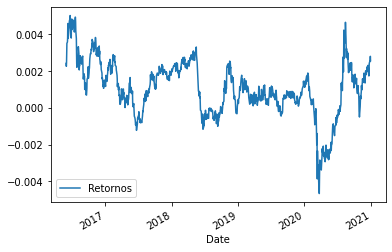

In [ ]:
mm_portfolio.plot();

In [ ]:
#Drawdown 30 dias

rolling_drawdown = retorno_portfolio.rolling(window=30).min()

In [ ]:
rolling_drawdown

,Retornos
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2020-12-22,-0.023113
2020-12-23,-0.023113
2020-12-28,-0.023113


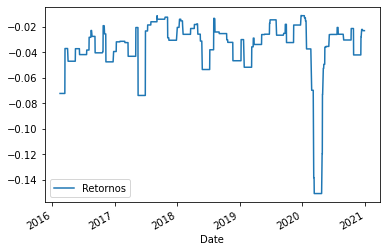

In [ ]:
rolling_drawdown.plot();

##10. Value At Risk

In [ ]:
#VaR Histórico

import numpy as np

In [ ]:
var_95 = np.nanpercentile(retorno_portfolio,5)
var_98 = np.nanpercentile(retorno_portfolio,2)
var_99 = np.nanpercentile(retorno_portfolio,1)

print(var_95, var_98, var_99)

-0.02759927055379177 -0.038187509795320276 -0.04743489063032398


In [ ]:
#VaR Parametrico

media_retorno_portofolio = np.mean(retorno_portfolio)
desvio_carteira = vol_carteira

In [ ]:
from scipy.stats import norm

In [ ]:
var_p_90 = norm.ppf(1-0.9, media_retorno_portofolio, desvio_carteira)
var_p_90

array([-0.02403914])

In [ ]:
var_p_98 = norm.ppf(1-0.98, media_retorno_portofolio, desvio_carteira)
var_p_98

array([-0.0392724])

##11. Retorno Anualizado

In [ ]:
retorno_anualizado = (carteira_precos.iloc[-1]-carteira_precos.iloc[0])/(carteira_precos.iloc[0])

In [ ]:
retorno_anualizado

ITSA4    1.779621
PETR4    3.300455
ABEV3    0.000639
VALE3    5.891253
dtype: float64

In [ ]:
retorno_an_carteira = ((1+retorno_anualizado)**(12/60))-1
retorno_an_carteira

ITSA4    0.226866
PETR4    0.338760
ABEV3    0.000128
VALE3    0.471159
dtype: float64

In [ ]:
retorno_an_carteira = retorno_an_carteira.dot(pesos)
retorno_an_carteira

0.25922834139625117

#12.Sharpe Ratio

S = (Rp - Rf)/Vol Portfolio

In [ ]:
#Selic - taxa livre de risco

selic = 0.0625

In [ ]:
sharpe_ratio = ((retorno_portfolio.mean()*252)-selic)/(vol_ano)

sharpe_ratio

Retornos    0.800048
dtype: float64

##13. Sortino Ratio

Sortino = (Rp - Rf)/Semivariancia

In [ ]:
sortino = ((retorno_portfolio.mean()*252)-selic)/(retorno_portfolio[retorno_portfolio<0].std()*np.sqrt(252))
sortino

Retornos    1.054668
dtype: float64

##14. Max Drawdown

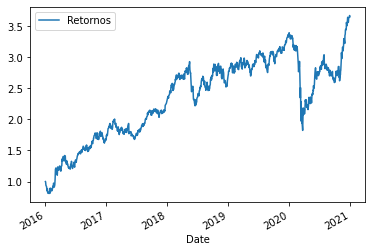

In [ ]:
retorno_acm_carteira.plot();

In [ ]:
pico = retorno_acm_carteira.expanding(min_periods=1).max()
dd = (retorno_acm_carteira/pico)-1
drawdown = dd.min()
drawdown

Retornos   -0.462849
dtype: float64

##15. Calmar Ratio

Calmar = Retorno Portfolio / Max Drawdown

In [ ]:
calmar = (retorno_portfolio.mean()*252)/abs(drawdown)
calmar

Retornos    0.676337
dtype: float64